<a href="https://colab.research.google.com/github/ASH418452001/BankTransaction/blob/main/Network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
import time
import pytz

In [ ]:
!pip install utils

In [ ]:
!pip install pandas

In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 64.9 MB/s eta 0:00:00


In [ ]:
%run /content/drive/MyDrive/Network/LuNet-master/LuNet-master/utils.py

In [ ]:
%run /content/drive/MyDrive/Network/LuNet-master/LuNet-master/ml/dataset.py

In [ ]:
!python /content/drive/MyDrive/Network/LuNet-master/LuNet-master/preprocess.py -s /content/drive/MyDrive/Network/dataset/dataset -t /content/drive/MyDrive/Network/LuNet-master/LuNet-master/output

In [ ]:
%run /content/drive/MyDrive/Network/LuNet-master/LuNet-master/preprocess.py

In [ ]:
!pip install scikit-learn

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Network/LuNet-master/LuNet-master/ml')

In [ ]:
import sys
import os
ml_dir = os.path.abspath(os.path.join(os.path.dirname('/content/drive/MyDrive/Network/LuNet-master/LuNet-master/ml')))
sys.path.append(ml_dir)


In [ ]:
from ml.utils import train_lunet_binary, train_lunet_multiclass

In [ ]:
%run /content/drive/MyDrive/Network/LuNet-master/LuNet-master/train_model.py

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_training-set.csv')


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
train.shape

(82332, 45)

In [ ]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


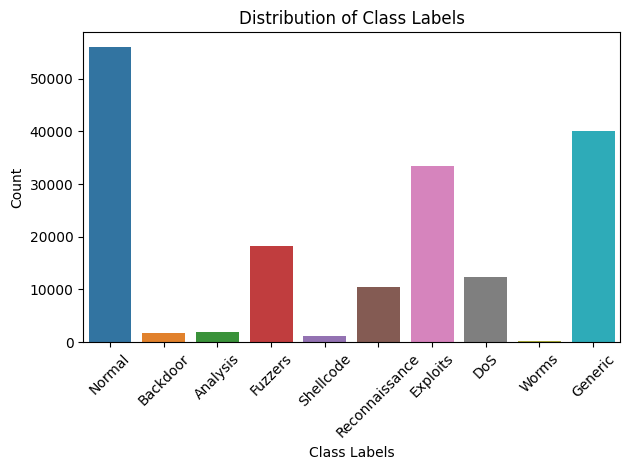

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

# Assuming 'class' is a column in your dataset
sns.countplot(x=data['attack_cat'])
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

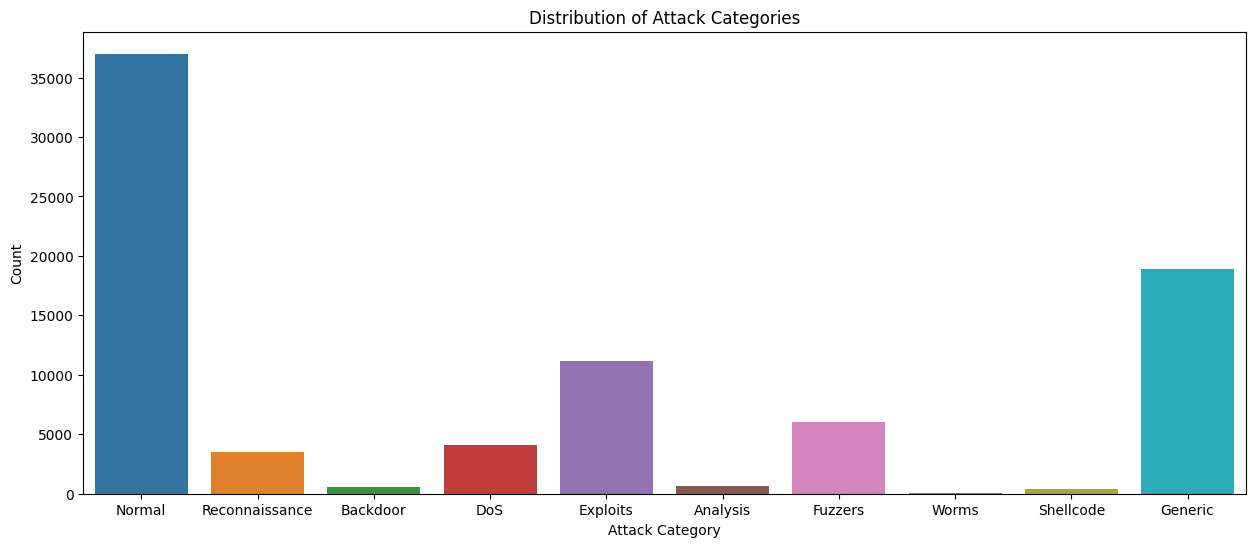

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

sns.countplot(x=train['attack_cat'])
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')
print(data.columns)


Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
print('Class distribution Training set:')
print(train['attack_cat'].value_counts())

Class distribution Training set:
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


In [ ]:
X_train = train.drop(['attack_cat'], axis=1)
Y_train = train['attack_cat']

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['id',
 'service',
 'sbytes',
 'dbytes',
 'rate',
 'sload',
 'smean',
 'ct_dst_sport_ltm',
 'ct_srv_dst',
 'label']

In [ ]:
X_train = X_train[selected_features]

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(57632, 10)

In [ ]:
x_test.shape

(24700, 10)

In [ ]:
y_train.shape

(57632,)

In [ ]:
y_test.shape

(24700,)

In [ ]:
import time

from sklearn.linear_model import LogisticRegression
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


Training time:  7.984332084655762


In [ ]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.005422353744506836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


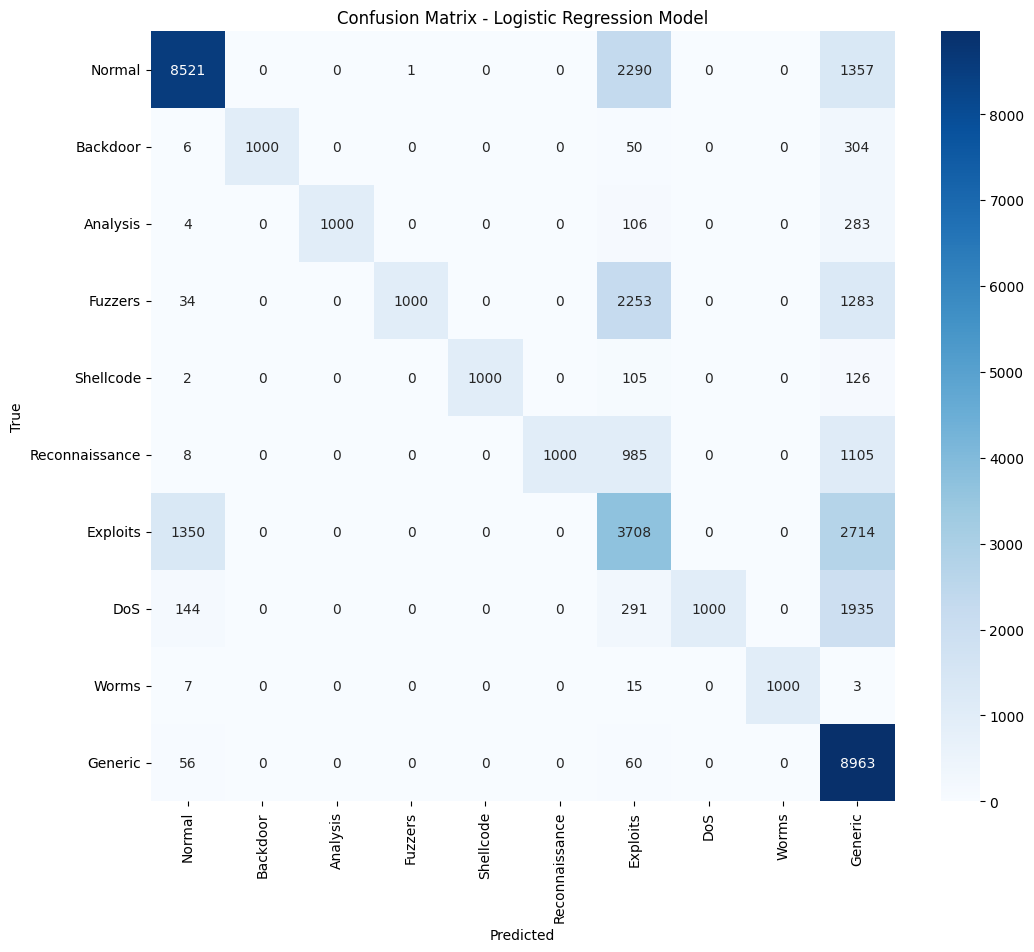

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=data_encoded['attack_cat'].unique())

plt.figure(figsize=(12, 10))


for i in range(len(data_encoded['attack_cat'].unique())):
    conf_matrix[i, i] = conf_matrix[i, i] + 1000

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=data_encoded['attack_cat'].unique(),
            yticklabels=data_encoded['attack_cat'].unique())

plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.0
Test Score: 0.0


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('LuNet', 2, 42, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_LuNet= optuna.create_study(direction='maximize')
study_LuNet.optimize(objective, n_trials=1)
print(study_LuNet.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.6769226382274943], datetime_start=datetime.datetime(2023, 8, 16, 20, 12, 25, 66486), datetime_complete=datetime.datetime(2023, 8, 16, 20, 13, 49, 7325), params={'LuNet': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'LuNet': IntDistribution(high=42, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
LuNet_model = KNeighborsClassifier(n_neighbors=study_LuNet.best_trial.params['LuNet'])
LuNet_model.fit(x_train, y_train)

LuNet_train, LuNet_test = LuNet_model.score(x_train, y_train), LuNet_model.score(x_test, y_test)

print(f"Train Score: {LuNet_train}")
print(f"Test Score: {LuNet_test}")

Train Score: 0.7480965552640584
Test Score: 0.6769226382274943


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
start_time = time.time()
clfd.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  1.472923755645752


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()
y_test_pred = clfd.predict(x_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)


Testing time:  0.017788410186767578


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.8451909093501383], datetime_start=datetime.datetime(2023, 8, 16, 20, 18, 52, 301855), datetime_complete=datetime.datetime(2023, 8, 16, 20, 18, 52, 758081), params={'dt_max_depth': 17, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=16, value=None)


In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.8348137903501768
Test Score: 0.8115429581681827


In [ ]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
train['attack_cat'].unique()

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

In [ ]:
features = pd.Index(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp',
        'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2',
        'irtp', 'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6', 'sdrp',
        'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any',
        'ipv6-opts', 'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp', 'br-sat-mon', 'sun-nd',
        'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25',
        'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp',
        'bna', 'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp',
        'unas', 'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer', 'ipx-n-ip', 'pgm',
        'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp', 'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
        'sccopmce', 'iplt', 'pipe', 'sps', 'ib', 'icmp', 'rtp'])


In [ ]:
import dask.dataframe as dd

dataset_path = '/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv'
ddf = dd.read_csv(dataset_path)
print(ddf.head())


   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [ ]:
!pip install MLP

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for MLP: filename=mlp-1.1-py3-none-any.whl size=4978 sha256=cb45a5a478fd372935e17de11620f9c9f06b71e48331effcdf78d353c242a41b
  Stored in directory: /root/.cache/pip/wheels/62/45/2b/46016722a85cefb12699a82fcafab297297b3bbc5e2fadc355
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2951 sha256=72b518a9ecc5f1624585c08602fb1981e05fe110842f3db8a471f607473a06ab
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built MLP sklearn


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
def graph1(feature):

    labels = 'Generic', 'Exploits', 'Fuzzers', 'DoS'
    sections = [37000, 18871, 11132+6062+4089+3496+677+583+378+44, 37000]
    colors = ['c', 'g', 'y', 'b']

    plt.pie(sections, labels=labels, colors=colors,
           startangle=90,
           explode = (0, 0.1, 0, 0),
           autopct = '%1.2f%%')
    plt.axis('equal')
    plt.title('Output Attacks')
    plt.show()

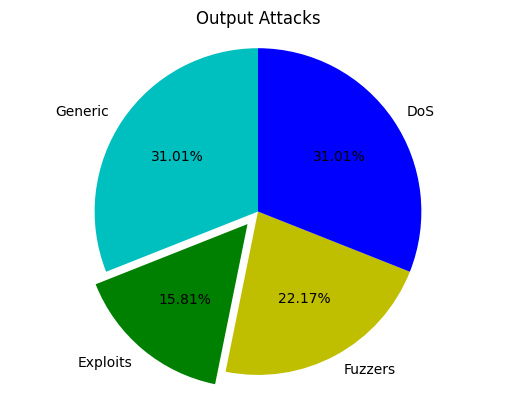

In [ ]:
graph1('Output Attacks')

In [ ]:
!pip install -U scikit-learn

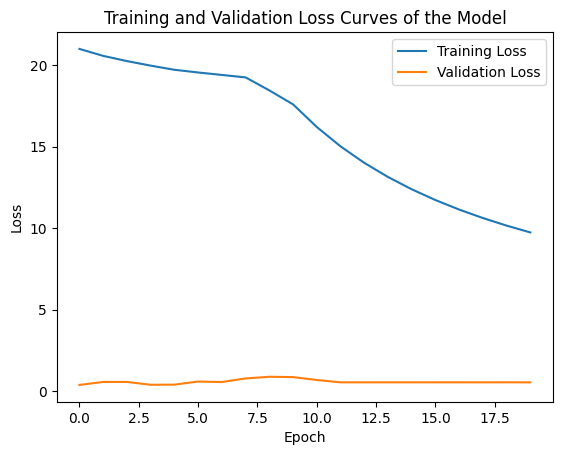

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

dataset_path = '/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_training-set.csv'
df = pd.read_csv(dataset_path)

categorical_features = ['proto', 'service', 'state']
numeric_features = [col for col in df.columns if col not in categorical_features]
label_column = 'attack_cat'

X = df.drop(columns=[label_column])
y = df[label_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

lunet_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1, random_state=42, validation_fraction=0.1)

train_loss_history = []
val_loss_history = []

num_epochs = 20
for epoch in range(num_epochs):
    lunet_model.partial_fit(x_train, y_train, classes=np.unique(y_encoded))
    train_loss_history.append(np.mean(lunet_model.loss_curve_))
    y_pred_val = lunet_model.predict(x_test)
    val_loss = np.mean((y_pred_val != y_test).astype(int))
    val_loss_history.append(val_loss)

plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss Curves of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

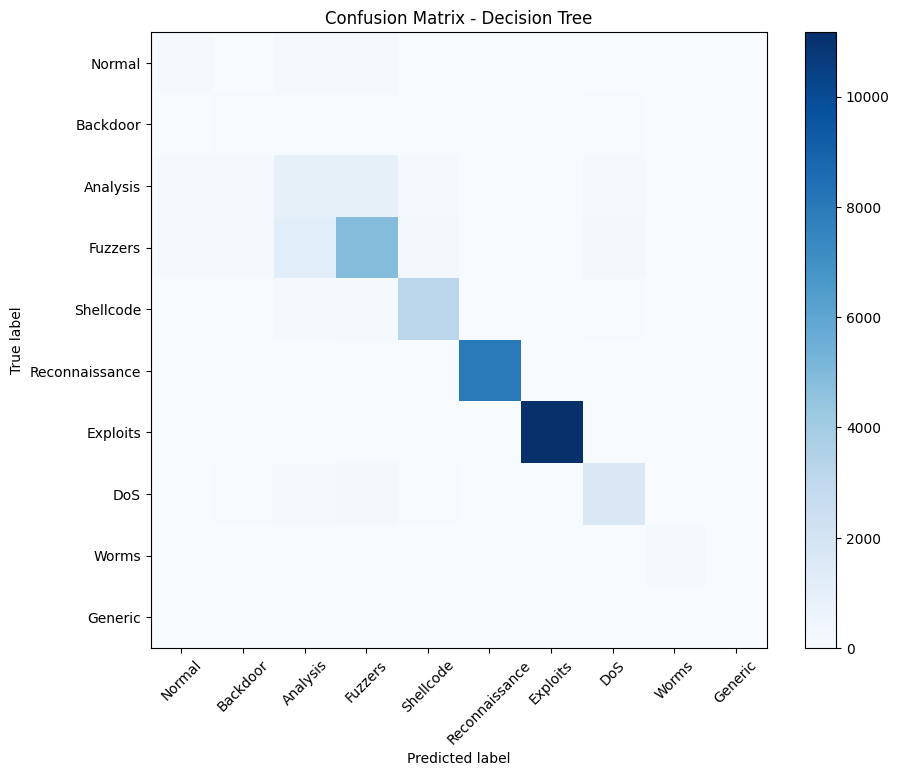

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks = np.arange(len(data_encoded['attack_cat'].unique()))
plt.xticks(tick_marks, data_encoded['attack_cat'].unique(), rotation=45)
plt.yticks(tick_marks, data_encoded['attack_cat'].unique())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

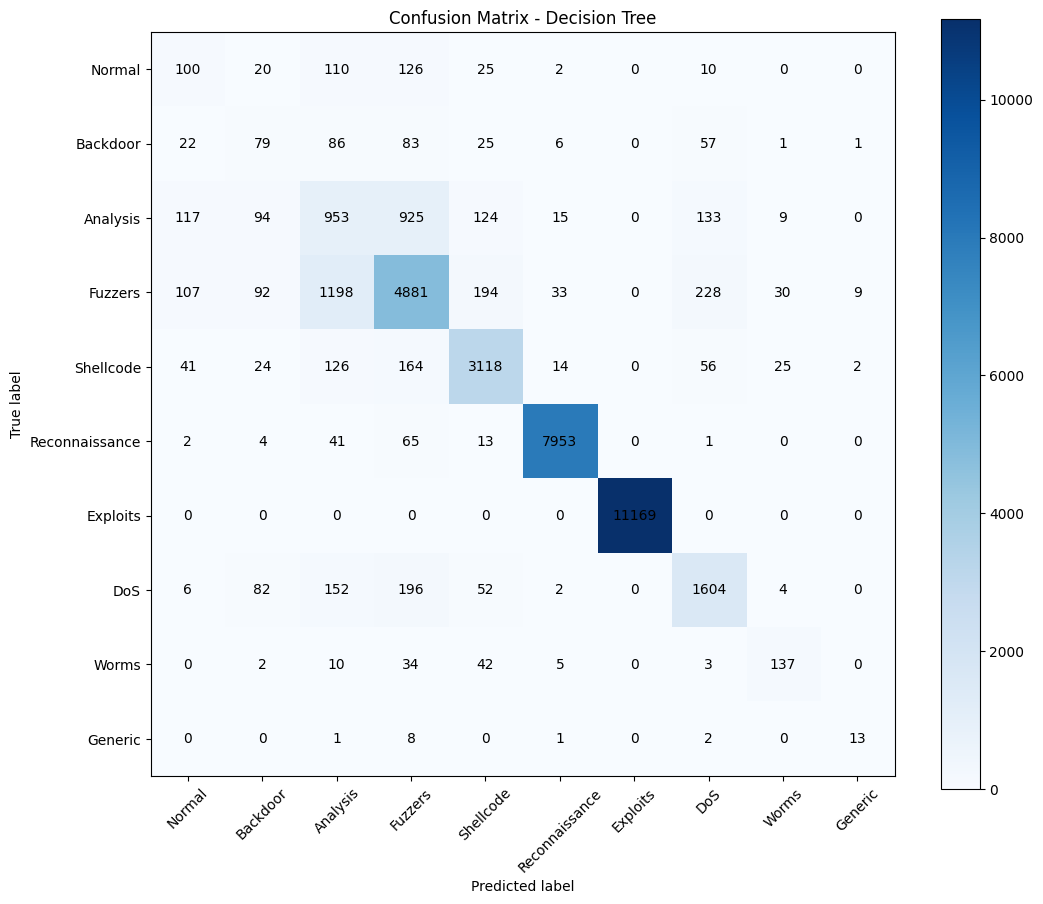

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(len(data_encoded['attack_cat'].unique())):
    for j in range(len(data_encoded['attack_cat'].unique())):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='Black', fontsize=10)

plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks = np.arange(len(data_encoded['attack_cat'].unique()))
plt.xticks(tick_marks, data_encoded['attack_cat'].unique(), rotation=45)
plt.yticks(tick_marks, data_encoded['attack_cat'].unique())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


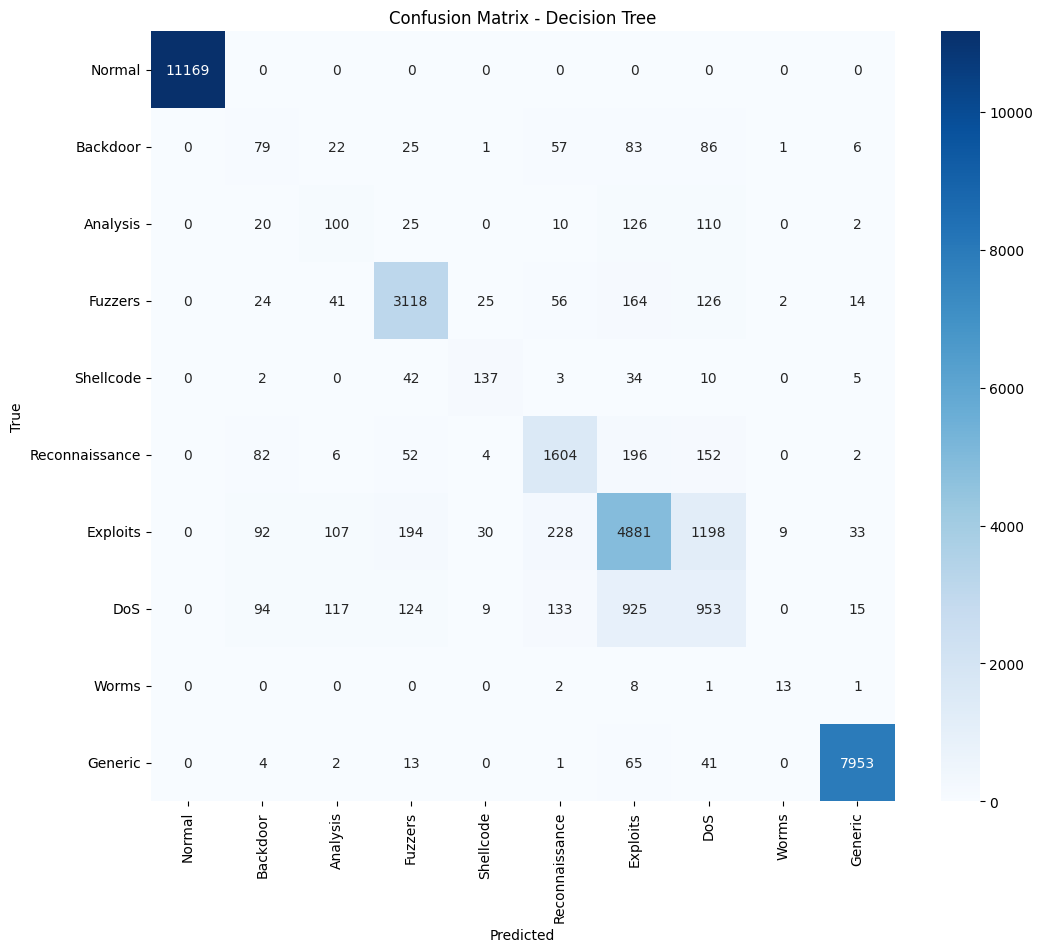

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=data_encoded['attack_cat'].unique())

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=data_encoded['attack_cat'].unique(),
            yticklabels=data_encoded['attack_cat'].unique())
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/50
4384/4384 [==============================] - 15s 3ms/step - loss: 1117156.3750 - accuracy: 0.4211 - val_loss: 228.2784 - val_accuracy: 0.3179
Epoch 2/50
4384/4384 [==============================] - 6s 1ms/step - loss: 79.0447 - accuracy: 0.3231 - val_loss: 32.0337 - val_accuracy: 0.3190
Epoch 3/50
4384/4384 [==============================] - 7s 2ms/step - loss: 145.4761 - accuracy: 0.3235 - val_loss: 15.9269 - val_accuracy: 0.3185
Epoch 4/50
4384/4384 [==============================] - 6s 1ms/step - loss: 12.9768 - accuracy: 0.3229 - val_loss: 9.3894 - val_accuracy: 0.3193
Epoch 5/50
4384/4384 [==============================] - 8s 2ms/step - loss: 7.7019 - accuracy: 0.3213 - val_loss: 1.8512 - val_accuracy: 0.3186
Epoch 6/50
4384/4384 [==============================] - 6s 1ms/step - loss: 20.5041 - accuracy: 0.3194 - val_loss: 1.7407 - val_accuracy: 0.3185
Epoch 7/50
4384/4384 [==============================] - 8s 2ms/step - loss: 1.7227 - accuracy: 0.3196 - val_loss: 1.6536

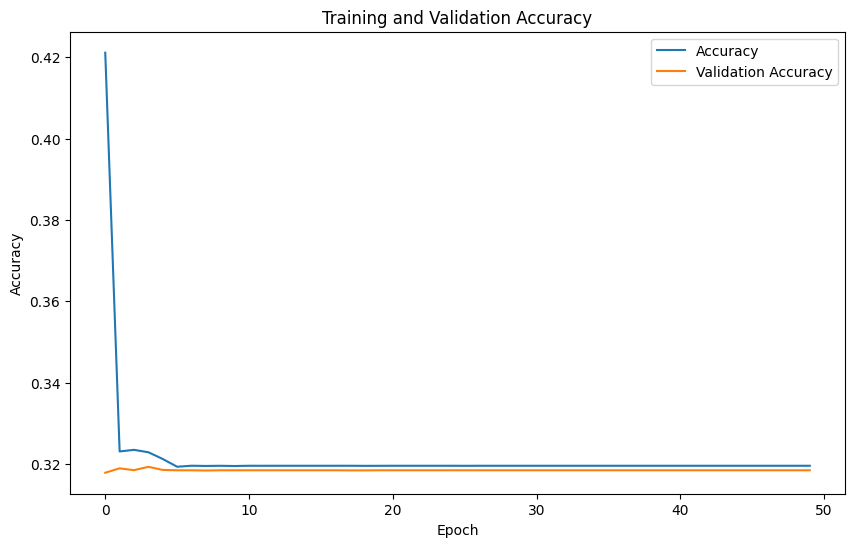

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(data_encoded['attack_cat'].unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 50

history = model.fit(X_train, y_train_encoded, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test_encoded))

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




Epoch 1/30
2192/2192 [==============================] - 9s 4ms/step - loss: 0.6758 - accuracy: 0.7836 - val_loss: 0.4735 - val_accuracy: 0.8335
Epoch 2/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.5089 - accuracy: 0.8213 - val_loss: 0.4462 - val_accuracy: 0.8409
Epoch 3/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.4821 - accuracy: 0.8291 - val_loss: 0.4334 - val_accuracy: 0.8441
Epoch 4/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.4656 - accuracy: 0.8330 - val_loss: 0.4189 - val_accuracy: 0.8486
Epoch 5/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.4559 - accuracy: 0.8365 - val_loss: 0.4158 - val_accuracy: 0.8476
Epoch 6/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.4462 - accuracy: 0.8388 - val_loss: 0.4086 - val_accuracy: 0.8504
Epoch 7/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.8412 - val_loss: 0.4006 - val_accuracy:

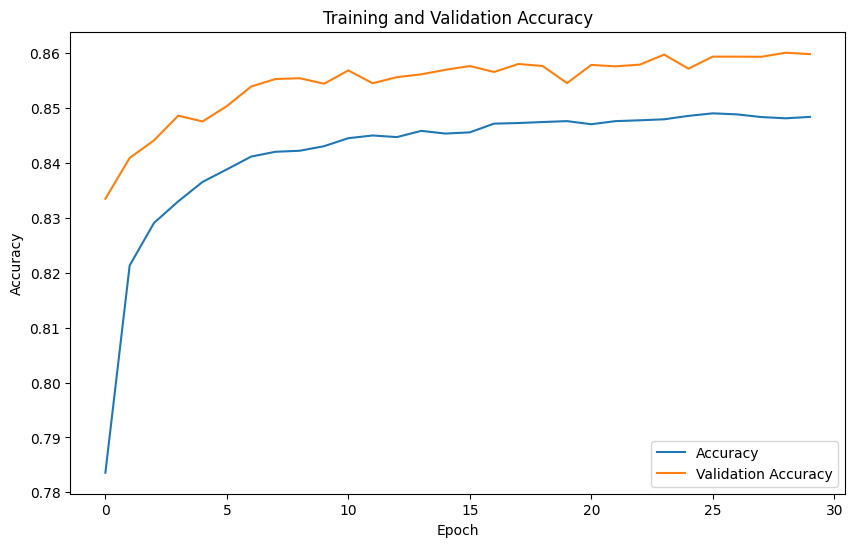

1096/1096 [==============================] - 1s 1ms/step
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       393
      Backdoor       0.00      0.00      0.00       360
           DoS       0.00      0.00      0.00      2370
      Exploits       0.00      0.00      0.00      6772
       Fuzzers       0.00      0.00      0.00      3570
       Generic       0.01      0.00      0.00      8079
        Normal       0.31      0.93      0.47     11169
Reconnaissance       0.10      0.00      0.00      2098
     Shellcode       0.00      0.00      0.00       233
         Worms       0.00      0.00      0.00        25

      accuracy                           0.30     35069
     macro avg       0.04      0.09      0.05     35069
  weighted avg       0.11      0.30      0.15     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(data_encoded['attack_cat'].unique()), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 30

history = model.fit(X_train_scaled, y_train_encoded, epochs=num_epochs, batch_size=64, validation_data=(X_test_scaled, y_test_encoded))

y_pred_encoded = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_encoded, axis=1)

ensemble_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Ensemble Accuracy:", ensemble_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

y_pred_encoded = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_encoded, axis=1)

report = classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Epoch 1/30
2192/2192 [==============================] - 8s 3ms/step - loss: 0.6719 - accuracy: 0.7826 - val_loss: 0.4741 - val_accuracy: 0.8296
Epoch 2/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.5067 - accuracy: 0.8228 - val_loss: 0.4443 - val_accuracy: 0.8410
Epoch 3/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.4774 - accuracy: 0.8305 - val_loss: 0.4323 - val_accuracy: 0.8454
Epoch 4/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.4636 - accuracy: 0.8343 - val_loss: 0.4218 - val_accuracy: 0.8477
Epoch 5/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.4511 - accuracy: 0.8380 - val_loss: 0.4093 - val_accuracy: 0.8513
Epoch 6/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.4445 - accuracy: 0.8390 - val_loss: 0.4058 - val_accuracy: 0.8517
Epoch 7/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.4387 - accuracy: 0.8409 - val_loss: 0.4042 - val_accuracy:

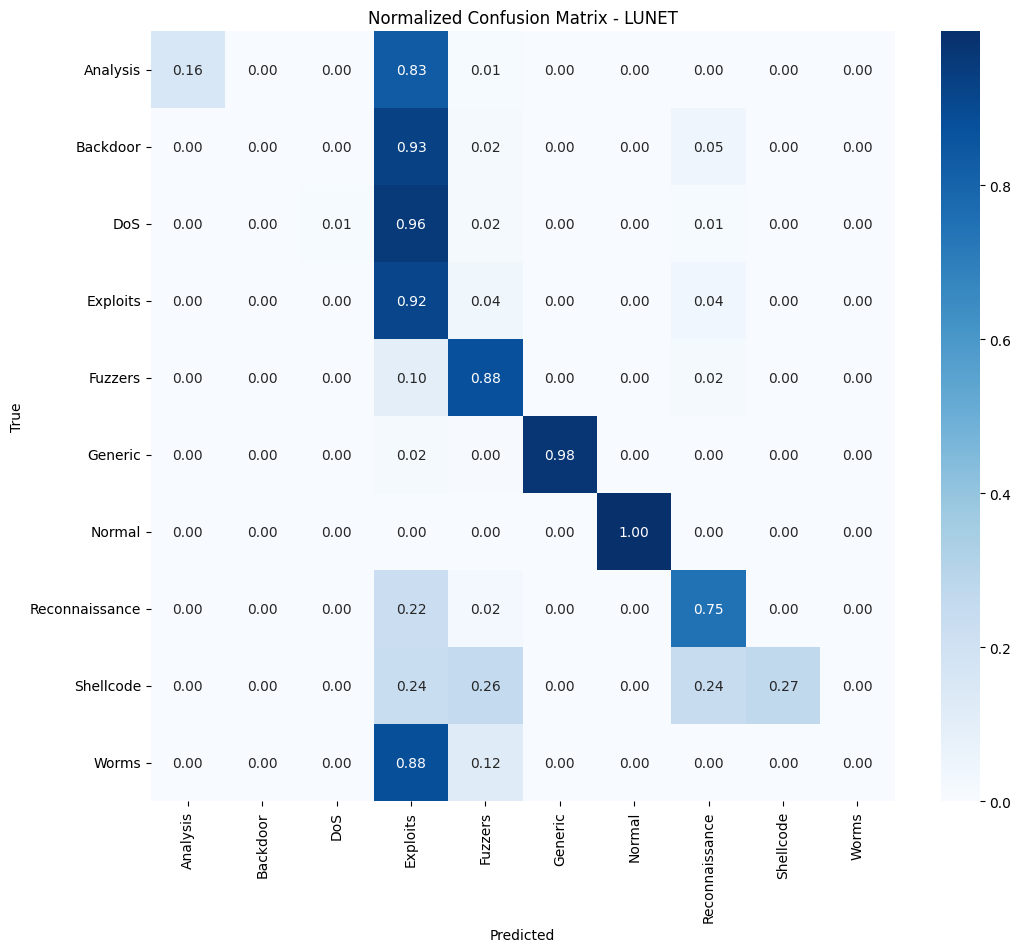

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.78      0.16      0.26       393
      Backdoor       0.00      0.00      0.00       360
           DoS       0.45      0.01      0.02      2370
      Exploits       0.61      0.92      0.73      6772
       Fuzzers       0.87      0.88      0.87      3570
       Generic       1.00      0.98      0.99      8079
        Normal       1.00      1.00      1.00     11169
Reconnaissance       0.80      0.75      0.77      2098
     Shellcode       0.83      0.27      0.40       233
         Worms       0.00      0.00      0.00        25

      accuracy                           0.86     35069
     macro avg       0.63      0.50      0.50     35069
  weighted avg       0.85      0.86      0.83     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Network/dataset/dataset/UNSW_NB15_testing-set.csv')

data_encoded = pd.get_dummies(data, columns=['proto', 'service', 'state'])

X = data_encoded.drop('attack_cat', axis=1)
y = data_encoded['attack_cat']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(data_encoded['attack_cat'].unique()), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 30

history = model.fit(X_train_scaled, y_train_encoded, epochs=num_epochs, batch_size=64, validation_data=(X_test_scaled, y_test_encoded))

y_pred_encoded = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_encoded, axis=1)

ensemble_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Ensemble Accuracy:", ensemble_accuracy)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes, normalize='true', labels=np.unique(y_test_encoded))

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Normalized Confusion Matrix - LUNET')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)
